In [12]:
print(__doc__)

Automatically created module for IPython interactive environment


In [13]:
import numpy as np
import wave as wv
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io.wavfile
from sklearn.decomposition import FastICA

# Get samples from wav files

4678.62565787


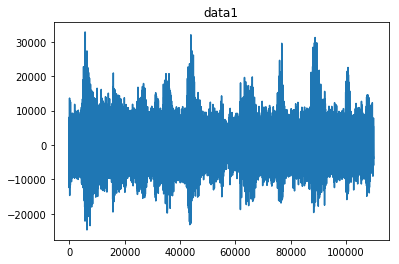

2534.7114041


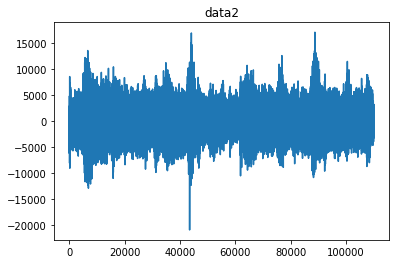

In [23]:
sourceFilesPrefix="AudioSources\\speech-"
resultFilesPrefix="AudioResults\\speech-"
rate1, sample1_data = scipy.io.wavfile.read(sourceFilesPrefix+"1.wav")
print(sample1_data.std(axis=0))
plt.figure(1)
plt.plot(sample1_data)
plt.title("data1")
plt.show()

rate2, sample2_data=scipy.io.wavfile.read(sourceFilesPrefix+"2.wav")
print(sample2_data.std(axis=0))
plt.figure(2)
plt.plot(sample2_data)
plt.title("data2")
plt.show()

In [24]:
S=np.c_[sample1_data,sample2_data]
print(S)
median=S.std(axis=0)
print(median)
S= S/median

print(S)

[[ 3812  2732]
 [ 5380  2868]
 [ 4391  2564]
 ..., 
 [-1756 -1198]
 [-1939 -2648]
 [-3867 -2960]]
[ 4678.62565787  2534.7114041 ]
[[ 0.81476918  1.07783474]
 [ 1.14991034  1.13148976]
 [ 0.93852347  1.011555  ]
 ..., 
 [-0.37532389 -0.47263763]
 [-0.41443794 -1.04469487]
 [-0.82652477 -1.16778581]]


In [25]:
#print(S)
ica = FastICA(n_components=2)
S_=ica.fit_transform(S)
A_=ica.mixing_
M_=ica.mean_
print(A_)
print(M_)

[[ 168.58620466  285.61983754]
 [ -48.55125149  328.0895853 ]]
[-0.00010699 -0.00020098]


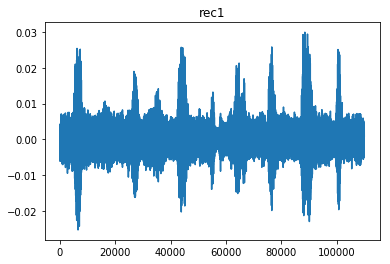

[-0.00058625  0.00078168  0.00027432 ...,  0.00017104  0.00234741
  0.00090124]


In [26]:
plt.figure(3)
plt.plot(S_.T[0])
plt.title("rec1")
plt.show()
print(S_.T[0])

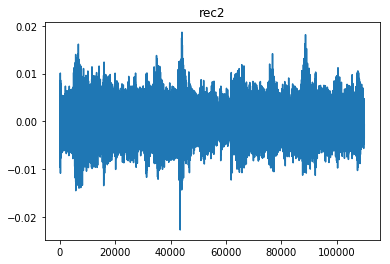

[ 0.00319904  0.00356501  0.00312437 ..., -0.00141465 -0.00283619
 -0.00342537]


In [27]:
plt.figure(4)
plt.plot(S_.T[1])
plt.title("rec2")
plt.show()
print(S_.T[1])

In [28]:
scipy.io.wavfile.write(resultFilesPrefix+"1.wav",16000,S_.T[0])

In [29]:
scipy.io.wavfile.write(resultFilesPrefix+"2.wav",16000,S_.T[1])